# dtw data

In [2]:
from nbimports import *

In [3]:
filename = "../data/user/data_18052022_151548.csv"

In [4]:
data = pd.read_csv(filename, index_col=0)
data.columns = ['source', 'data']

In [5]:
rows = []
for i, row in select(data, source='/dtw').iterrows():
    row = eval(row['data'])
    rows.append(row)

In [6]:
df = pd.DataFrame(rows)

In [7]:
df.head(2)

,then,fl,segment_id,worker_0,best_id,min_dtw,min_dtw_pond,worker_1,avg_dtw
0,10679.055185,43,0,10374.387189,0,0.000000,0.000000,10374.469292,0.000000
1,11366.761458,69,1,11061.176718,1,19.701166,0.351807,11064.726276,0.175903


<AxesSubplot:>

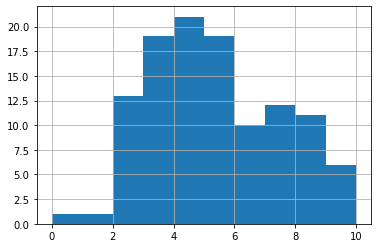

In [8]:
df['min_dtw'].hist(range=(0, 10))

<AxesSubplot:>

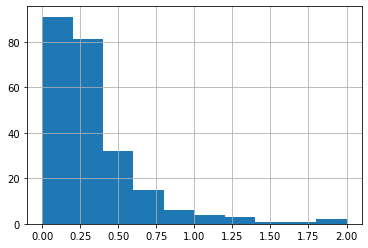

In [10]:
df['min_dtw_pond'].hist(range=(0, 2))

<AxesSubplot:>

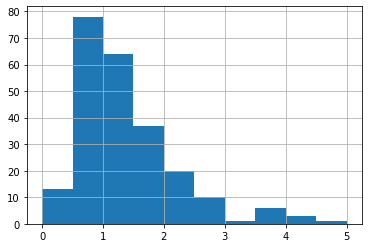

In [14]:
(df['min_dtw_pond']/df['avg_dtw']).hist(range=(0, 5))

Text(0.5, 0, 'segment length')

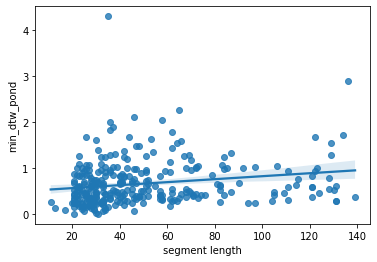

In [8]:
fig, ax = plt.subplots()
sns.regplot(data=df.iloc[1:], x='fl', y='min_dtw_pond', ax=ax)
ax.set_xlabel("segment length")

<AxesSubplot:xlabel='fl', ylabel='min_dtw_pond'>

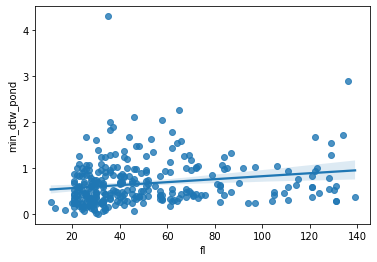

In [9]:
sns.regplot(data=df.iloc[1:], x='fl', y='min_dtw_pond')

<AxesSubplot:>

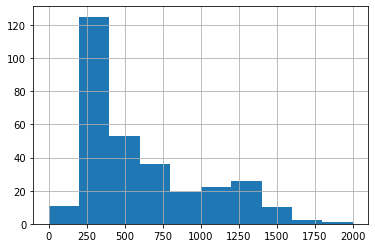

In [10]:
df['then'].diff().hist(range=(0, 2000))

<AxesSubplot:xlabel='min_dtw_pond', ylabel='Count'>

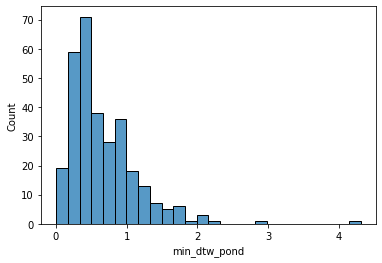

In [11]:
sns.histplot(data=df.iloc[1:], x='min_dtw_pond')

<AxesSubplot:xlabel='min_dtw', ylabel='Count'>

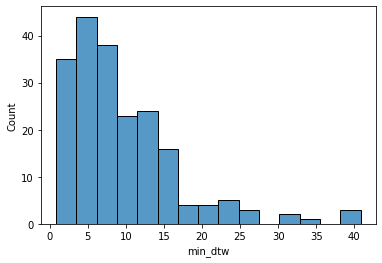

In [23]:
sns.histplot(data=df.iloc[1:], x='min_dtw')

In [13]:
df[df.duplicated(subset=['segment_id'])]

,then,fl,segment_id,worker_0,best_id,min_dtw,min_dtw_pond,worker_1


In [8]:
x = np.linspace(0, 10, 100)
y = [np.count_nonzero(df['min_dtw'] < xi) for xi in x]

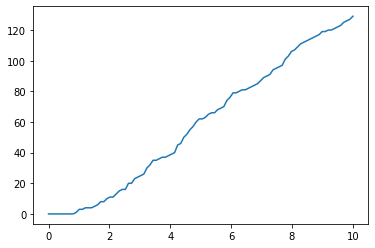

In [9]:
plt.plot(x, y)

<AxesSubplot:>

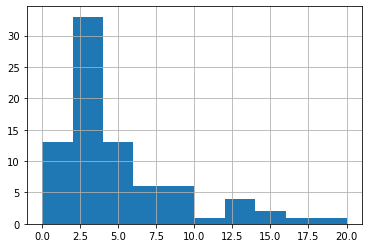

In [9]:
df['min_dtw'].hist(range=[0, 20])

In [10]:
df.head()

,then,fl,segment_id,worker_0,best_id,min_dtw,min_dtw_pond,worker_1
0,2377.758190,48,0,1928.112314,0,10000.000000,10000.000000,1928.186541
1,2817.418411,43,1,2366.346820,1,18.155112,0.399013,2367.970387
2,3577.613964,76,2,3126.571531,1,2.745259,0.046139,3139.652775
3,3939.165794,37,3,3488.080969,1,2.147943,0.053699,3488.430225
4,4418.363191,48,4,3967.355103,1,2.155334,0.047370,3968.029177


In [26]:
segment_graph = {}
for i, row in df.iterrows():
    si = int(row['segment_id'])
    bi = int(row['best_id'])
    md = row['min_dtw']

    # print(si, bi, segment_graph)

    if si == 0:
        segment_graph[si] = []
    if md < 2:
        segment_graph[bi].append(si)
    else:
        segment_graph[si] = []

## JS DTW